In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss
              
 #parameters 
n = 4.0                                    #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
re = 1.0                                   #1kpc
L = 5.0e9                                  #luminosity

 #gamma function
f = lambda x: ss.gammainc(2*n,x)*ss.gamma(2*n)-0.5*ss.gamma(2*n)
root = so.brentq(f,0,500000,rtol=0.000001,maxiter=100) #come within 1% of exact root within 100 iterations
bn = root

I0 = (L*(bn**(2*n)))/(((re**2)*2*np.pi*n)*ss.gamma(2*n)) 

r0 = re/bn**n

print(r0)                              #in kpc
print(bn)
print(I0)

 #inner function
f = lambda x,m: ((np.exp(-np.power(x/r0, (1/n))))*(np.power(x/r0, ((1/n)-1))))/(np.sqrt((x**2)-(m**2)));


0.0002890603422216945
7.669249591476784
472413808255.474


In [2]:
 #integrate inner function
g = lambda m: quad(f, m, np.inf,args=(m,))[0]
print(g(10))

2.971072527289927e-10


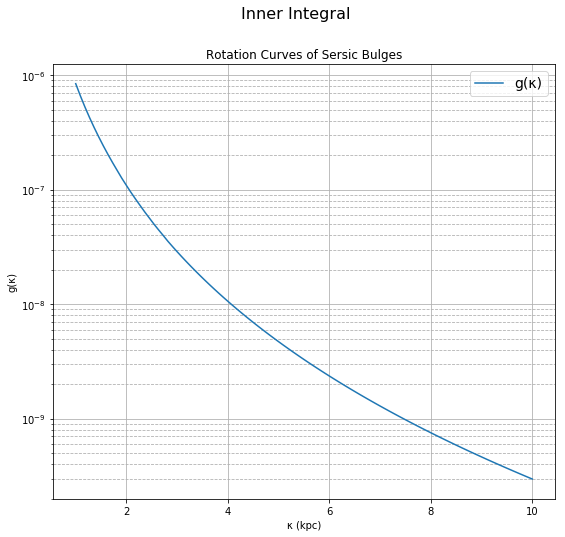

In [3]:
 #plotting inner integral
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                        #x from/to and line smoothness
gv = np.vectorize(g)

 #curves
plt.plot(x, gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA (kpc)', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [4]:
#parameters 
#I_0 = 1.0e12                                         #central surface brightness (20 mag/arcsec^2 = 1.08e3 cd/km^2)
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
ups = 1                                             #mass-to-light ratio (from Rotation Curves of Sersic Bulges paper)
q = 0.33                                            #intrinsic axis ratio
i = 45*(np.pi/180)                                  #inclination angle

 #equations
C = (4*G*q*ups*I0)/(r0*np.float(n))*(np.sqrt((np.sin(i)**2)+(1/(q**2))*(np.cos(i)**2)))
e2 = 1-(q**2)

 #plot range
x = np.linspace(0.001, 10, 200)

 #integrate outer function
h = lambda m,r: C*g(m)*(m**2)/(np.sqrt((r**2)-((m**2)*(e2))))

y = np.zeros(np.shape(x))
print(y)
for j,r in enumerate(x):
    hr = lambda m: h(m,r)
    yr = quad(h, 0, r,args=(r,))[0]
    y[j] = yr
print(x,y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, d

[1.00000000e-03 5.12462312e-02 1.01492462e-01 1.51738693e-01
 2.01984925e-01 2.52231156e-01 3.02477387e-01 3.52723618e-01
 4.02969849e-01 4.53216080e-01 5.03462312e-01 5.53708543e-01
 6.03954774e-01 6.54201005e-01 7.04447236e-01 7.54693467e-01
 8.04939698e-01 8.55185930e-01 9.05432161e-01 9.55678392e-01
 1.00592462e+00 1.05617085e+00 1.10641709e+00 1.15666332e+00
 1.20690955e+00 1.25715578e+00 1.30740201e+00 1.35764824e+00
 1.40789447e+00 1.45814070e+00 1.50838693e+00 1.55863317e+00
 1.60887940e+00 1.65912563e+00 1.70937186e+00 1.75961809e+00
 1.80986432e+00 1.86011055e+00 1.91035678e+00 1.96060302e+00
 2.01084925e+00 2.06109548e+00 2.11134171e+00 2.16158794e+00
 2.21183417e+00 2.26208040e+00 2.31232663e+00 2.36257286e+00
 2.41281910e+00 2.46306533e+00 2.51331156e+00 2.56355779e+00
 2.61380402e+00 2.66405025e+00 2.71429648e+00 2.76454271e+00
 2.81478894e+00 2.86503518e+00 2.91528141e+00 2.96552764e+00
 3.01577387e+00 3.06602010e+00 3.11626633e+00 3.16651256e+00
 3.21675879e+00 3.267005

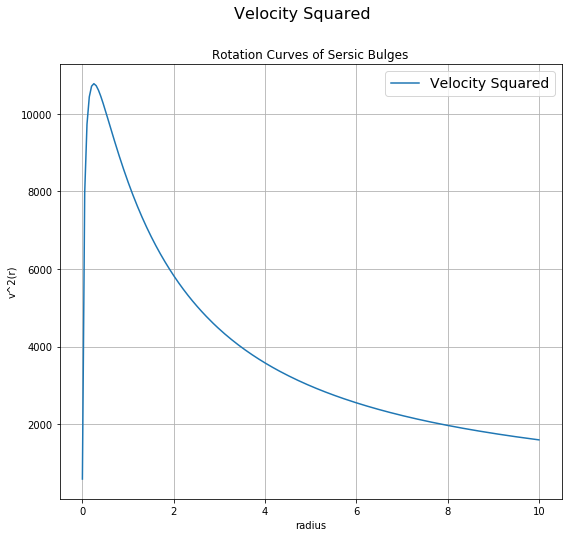

In [5]:
 #plotting velocity squared function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

#x = np.linspace(1, 10, 100)                    #x from/to and line smoothness
#lv = np.vectorize(l)

 #curves
#plt.plot(x, lv(x), linestyle='solid', label='Velocity Squared')          
plt.plot(x, y, linestyle='solid', label='Velocity Squared')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Squared', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='v^2(r)');

plt.legend(fontsize=14);                                   #adding legend
plt.show()

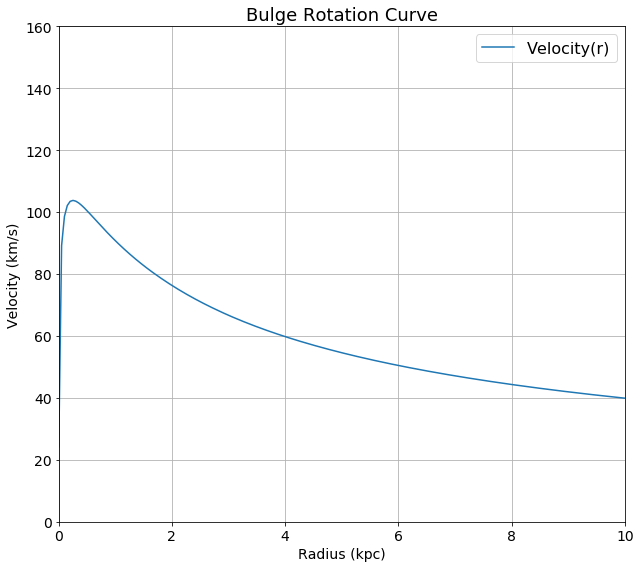

In [6]:
 #plotting bulge velocity curve

fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax3 = plt.axes()
ax3.grid(True)
ax3.yaxis.grid(True,which='minor',linestyle='--')

 #equation
v = np.sqrt(y)

 #curves
plt.plot(x, v, linestyle='solid', label='Velocity(r)')          

plt.axis([0, 10, 0, 160]);                         #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
#ax3.set_ylim(0,np.max(v)*1.3)
ax3.set_title('Bulge Rotation Curve', fontsize=18)              #labeling axes
ax3.set_xlabel('Radius (kpc)', fontsize=14)
ax3.set_ylabel('Velocity (km/s)', fontsize=14)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.tight_layout()
plt.savefig('Plot1_n4.png')
plt.show()